# Nubes de palabras con Python

Para generar la nube de palabras usamos la librería [wordcloud](https://github.com/amueller/word_cloud).

En los ejemplos que mostramos también usamos PIL (ya vista en la práctica( y NumPy.  

## ¿Qué es NumPy?

Es una librería muy utilizada y la base de pandas. 

Tiene múltiples usos. Principalmente nos permite trabajar con arreglos multidimensionales. 

Acá dejamos un ejemplo simple de manipulación de imágenes on NumPy que puede serles de interés como para introducirse en el uso de esta librerría: articulo en  https://realpython.com/numpy-tutorial/)

## Creamos nubes de palabras

Vamos a crear unas nubes de palabras con los nombres de los artistas del reporte obtenido de Spotify:
https://spotifycharts.com/regional/ar/weekly/latest


### Vamos a utilizar la librería wordcloud

Sitio: https://github.com/amueller/word_cloud

Primero procesamos el dataset:

In [1]:
import pandas as pd

ds = pd.read_csv('regional-ar-daily-latest.csv', encoding='utf-8')
ds

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Note that these figures are generated using a formula that protects against any artificial inflation of chart positions.,Unnamed: 4
0,Position,Track Name,Artist,Streams,URL
1,1,Todo De Ti,Rauw Alejandro,653541,https://open.spotify.com/track/4fSIb4hdOQ151TI...
2,2,Miénteme,TINI,437474,https://open.spotify.com/track/0cOa970mzTWAxKt...
3,3,Qué Más Pues?,J Balvin,369430,https://open.spotify.com/track/6hf0RpxTbOprT5n...
4,4,Pareja Del Año,Sebastian Yatra,323876,https://open.spotify.com/track/2rCbl9naJYhaxjL...
...,...,...,...,...,...
196,196,Barrio Prendido,The La Planta,26318,https://open.spotify.com/track/2I3qA0KslRCxFTf...
197,197,"3G (feat. Jon Z, Don Chezina, Chencho Corleone...",Wisin,26296,https://open.spotify.com/track/6dyUkkcyYuDiHOw...
198,198,Tu Veneno,J Balvin,26230,https://open.spotify.com/track/5KFHrrBMyGj5MhV...
199,199,Adiós,Gustavo Cerati,26008,https://open.spotify.com/track/1rh4kDY9T4fHVDu...


### Depuramos el dataset

In [2]:
ds.columns = ds.iloc[0]

In [3]:
artistas = ds[1:]
artistas

,Position,Track Name,Artist,Streams,URL
1,1,Todo De Ti,Rauw Alejandro,653541,https://open.spotify.com/track/4fSIb4hdOQ151TI...
2,2,Miénteme,TINI,437474,https://open.spotify.com/track/0cOa970mzTWAxKt...
3,3,Qué Más Pues?,J Balvin,369430,https://open.spotify.com/track/6hf0RpxTbOprT5n...
4,4,Pareja Del Año,Sebastian Yatra,323876,https://open.spotify.com/track/2rCbl9naJYhaxjL...
5,5,YO SE QUE TU (feat. Rusherking),FMK,311363,https://open.spotify.com/track/4M4DTyLupKvbJKl...
...,...,...,...,...,...
196,196,Barrio Prendido,The La Planta,26318,https://open.spotify.com/track/2I3qA0KslRCxFTf...
197,197,"3G (feat. Jon Z, Don Chezina, Chencho Corleone...",Wisin,26296,https://open.spotify.com/track/6dyUkkcyYuDiHOw...
198,198,Tu Veneno,J Balvin,26230,https://open.spotify.com/track/5KFHrrBMyGj5MhV...
199,199,Adiós,Gustavo Cerati,26008,https://open.spotify.com/track/1rh4kDY9T4fHVDu...


### Obtenemos los nombres de los artistas

Para esto, obtenermos los valores únicos de la columna "Artist".


In [12]:
palabras = artistas["Artist"].unique()

In [13]:
palabras

array(['Rauw Alejandro', 'TINI', 'J Balvin', 'Sebastian Yatra', 'FMK',
       'KHEA', 'Nio Garcia', 'Los Legendarios', 'Mora', 'Rusherking',
       'Maria Becerra', 'Duki', 'KAROL G', 'Olivia Rodrigo', 'Bizarrap',
       'Selena Gomez', 'Myke Towers', 'Crissin', 'L-Gante', 'Rochy RD',
       'BTS', 'Bruno LC', 'Boza', 'Sech', 'Bad Bunny', 'Big Apple',
       'Papu DJ', 'Asan', 'Damas Gratis', 'Luck Ra', 'Lil Nas X',
       'Nicki Nicole', 'Justin Bieber', 'Milly', 'Daddy Yankee',
       'Natti Natasha', 'Tiago PZK', 'Kali Uchis', 'Dillom', 'Dua Lipa',
       'Justin Quiles', 'Camilo', 'Migrantes', 'Alex Rose',
       'Manuel Turizo', 'Nicky Jam', 'The Weeknd', 'Ozuna', 'Maluma',
       'Doja Cat', 'C. Tangana', 'CNCO', 'Emilia', 'Harry Styles',
       "La K'onga", 'Bruno Mars', 'Pablo Alborán', 'Cazzu', 'j mena',
       'Ciro y los Persas', 'Arcangel', 'Wisin', 'Intoxicados', 'Gera MX',
       'Carlos Vives', 'Juhn', 'Nathy Peluso', 'El Reja', 'Papichamp',
       'Trueno', 'Luis Albert

## Ahora si, armamos la nube de palabras

Ejemplo sacado de https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [9]:
import numpy as np
from PIL import Image

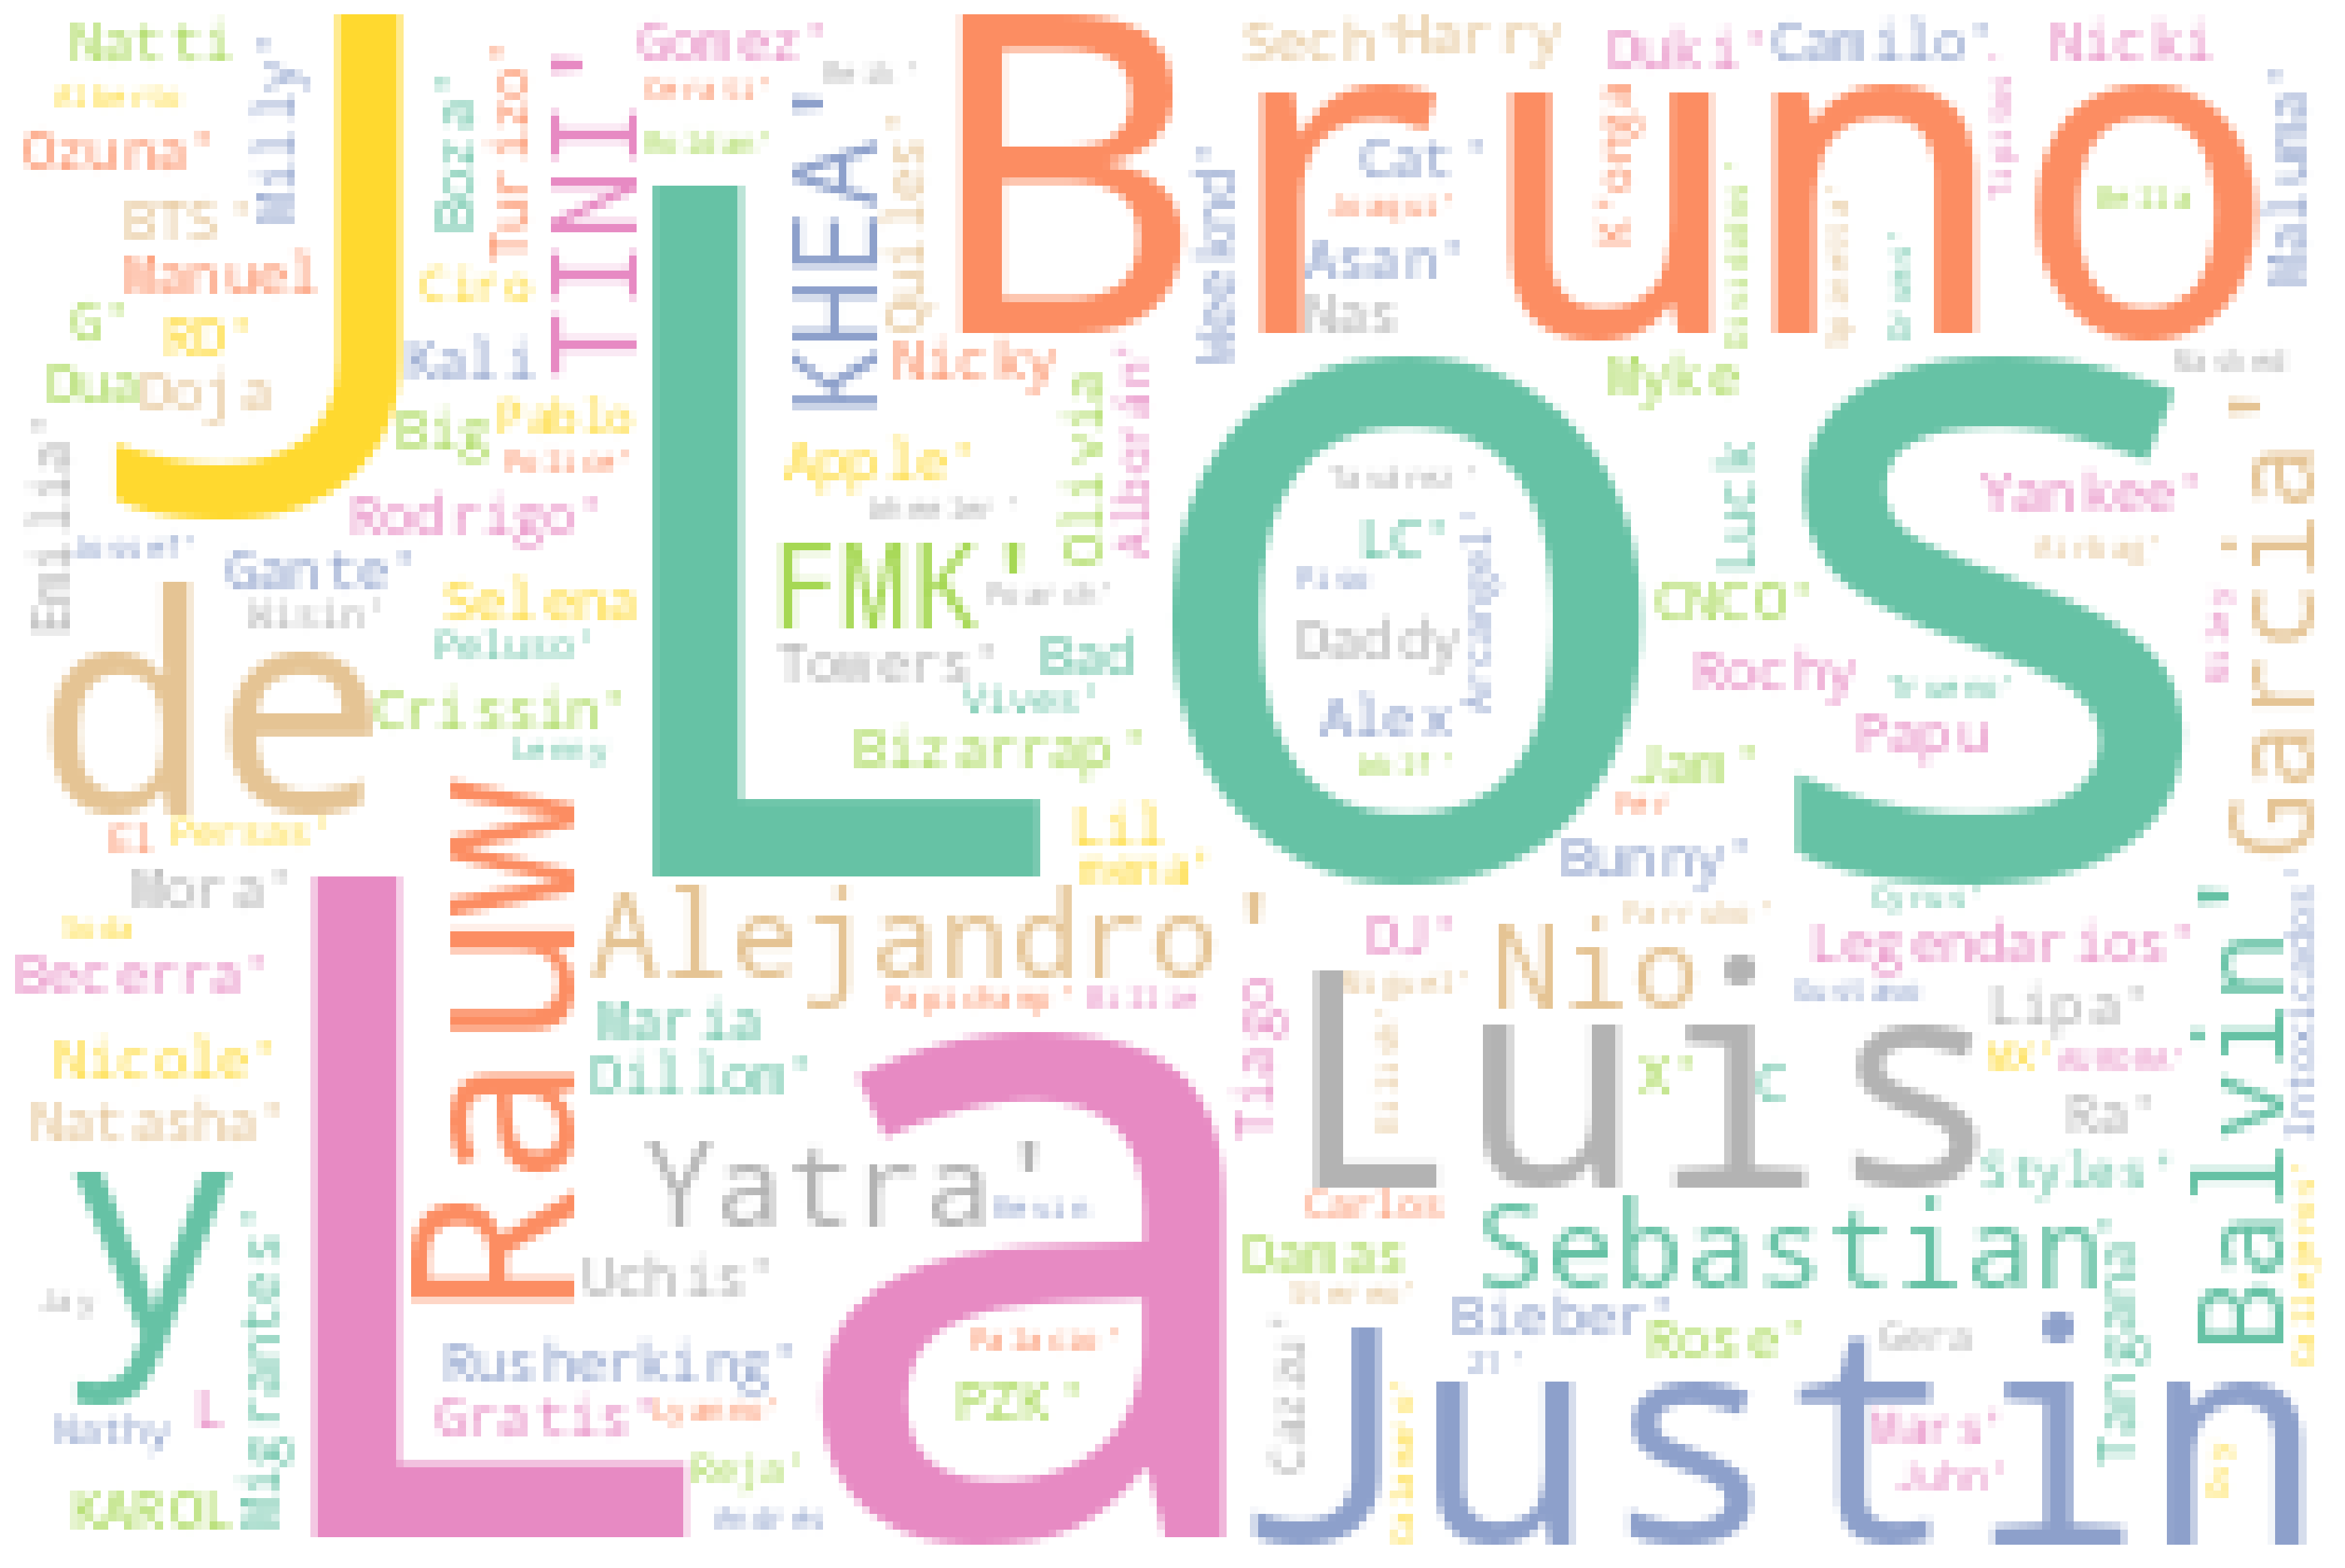

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
text = str(palabras)
#text = str([c.replace(' ','_') for c in palabras])

# Generate wordcloud
wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)


## Nubes con forma
También podemos utilizar una imagen para usar como máscara para "darle forma" a la nube de palabras.


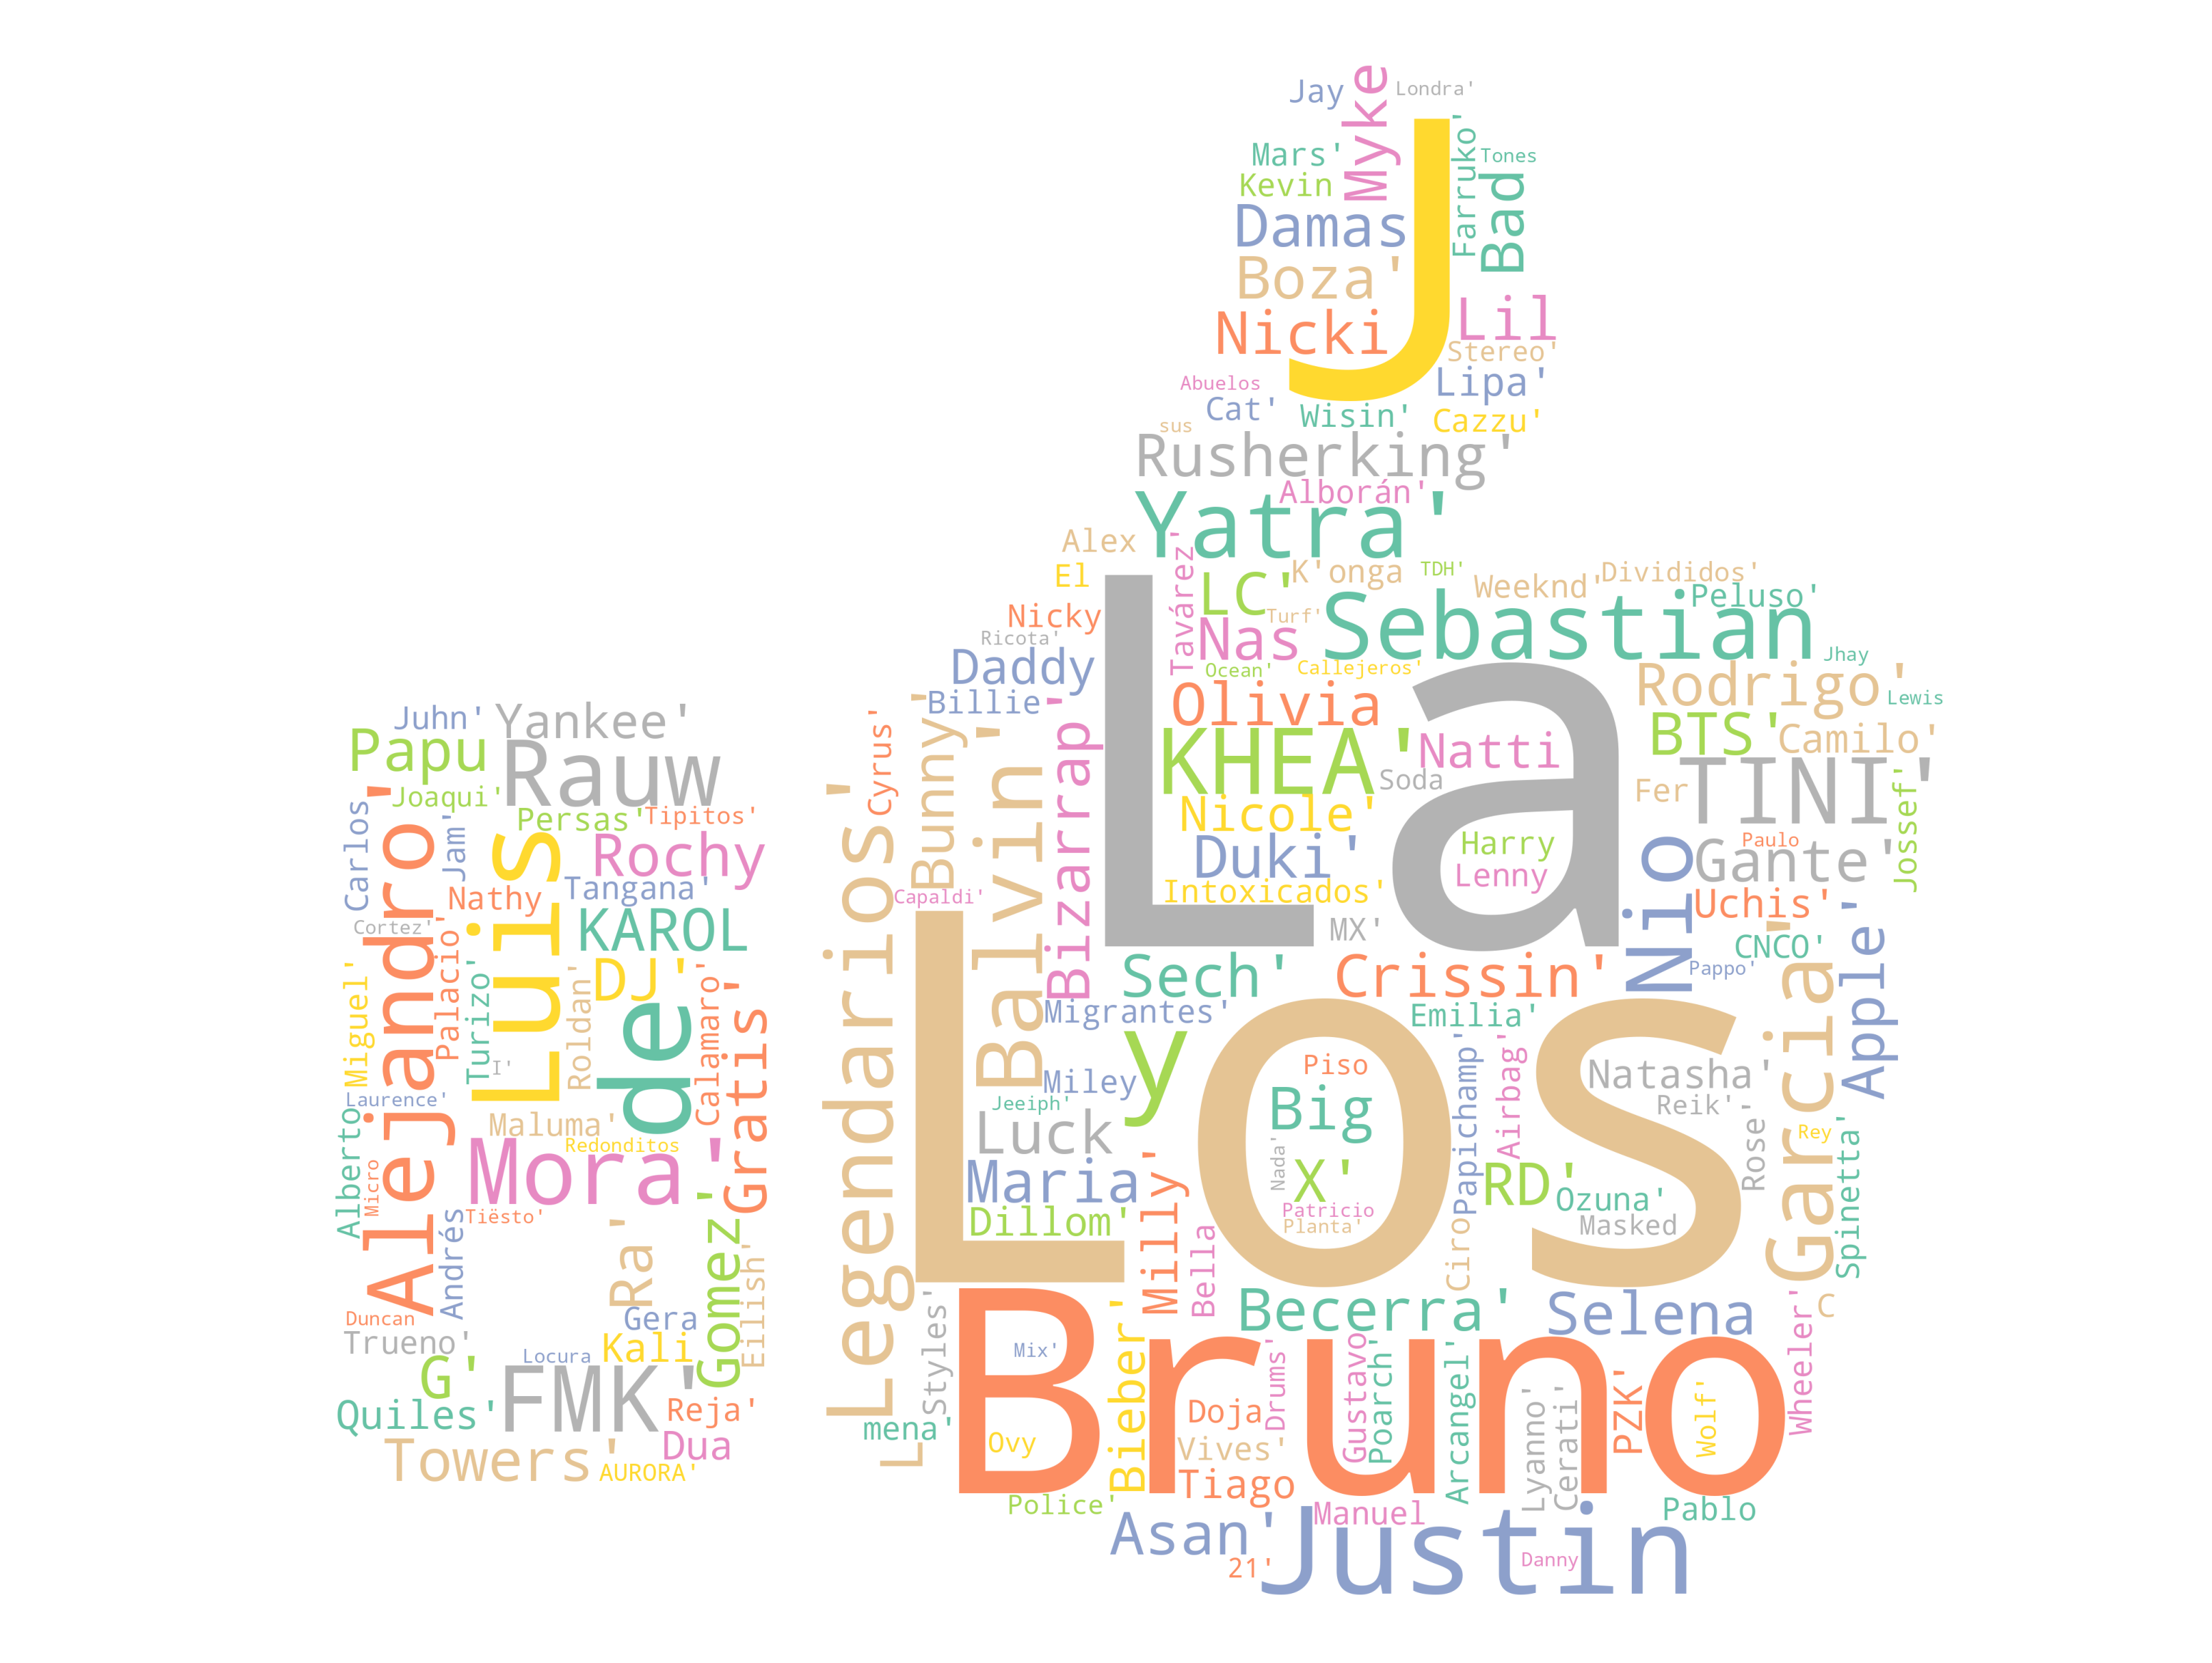

In [11]:
# Import image to np.array
mask = np.array(Image.open('upvote.png'))

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
# Plot
plot_cloud(wordcloud)

Más info en https://www.datacamp.com/community/tutorials/wordcloud-python